### PCP Module 1 - similarity_module

In [1]:
from load_dataset_module import music_features
from load_dataset_module import artist_music

import warnings
warnings.filterwarnings('ignore')

In [2]:
features = music_features()

Finished reading the command for music features.


In [3]:
artists = artist_music()

Finished reading the command for artist music.


In [4]:
features[30]

{'ID': '6XD6qJykJ91uC9AYb84ZeY',
 'Song Name': 'Chapter 4.12 - Zamek kaniowski',
 'Accoustiness': 0.6859999999999999,
 'Danceability': 0.715,
 'Energy': 0.22,
 'Liveness': 0.206,
 'Loudness': -19.788,
 'Popularity': 0.0,
 'Speechiness': 0.948,
 'Tempo': 113.214,
 'Valence': 0.545}

In [22]:
artists[40]

{'ID': '6bKJYhoaWIohnhspidbdW7',
 'Artists': 'Seweryn Goszczyński',
 'Song Name': 'Chapter 2.11 - Zamek kaniowski',
 'Accoustiness': 0.777,
 'Danceability': 0.738,
 'Energy': 0.282,
 'Liveness': 0.29,
 'Loudness': -16.555999999999994,
 'Popularity': 0.0,
 'Speechiness': 0.952,
 'Tempo': 140.612,
 'Valence': 0.703}

In [179]:
# Need to create a way to index and find an artist entry and return the features

feature = str(input("Please enter the feature you want to find for the artist you entered: ").capitalize())
fName = str(input("Please enter the first name of the 1st artist you want to find: ").capitalize())
lName = str(input("Please enter the surname of the artist you want to find: ").capitalize())

save = []
for i in range(1, len(artists)+1):
    if fName + " " + lName in artists[i]['Artists']:
        save.append(artists[i][feature])

fName = str(input("Please enter the first name of the 2nd artist you want to find: ").capitalize())
lName = str(input("Please enter the surname of the artist you want to find: ").capitalize())

save2 = []
for i in range(1, len(artists)+1):
    if fName + " " + lName in artists[i]['Artists']:
        save2.append(artists[i][feature])

Please enter the first name of the 1st artist you want to find: vladimir
Please enter the surname of the artist you want to find: horowitz
Please enter the feature you want to find for the artist you entered: tempo
Please enter the first name of the 2nd artist you want to find: carl
Please enter the surname of the artist you want to find: Woitschach


## Euclidean Similarity Function

In [6]:
def euclidean_similarity(dict_name, id1, id2):
    import math
    
    try:   
        dict_name = dict_name
    
        if id1 == '':
            id1 = int(input("Please insert your first id for music features: "))
        else:
            id1 = id1
        
        if id2 == '':
            id2 = int(input("Please insert your second id for music features: "))
        else:
            id2 = id2
                
        if id1 == id2:
            print("You can't have the same ID, please choose 2 different IDs.")
        else:
            query = input("Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. ").capitalize()

            if query == '' or query == "No".capitalize():
                print("Comparing all respective features.\n")
                feature_list = list(dict_name[id1].values())[-9:]
                feature_list2 = list(dict_name[id2].values())[-9:]
                key_list = str(list(dict_name[id1].keys())[-9:]).split(',')
            
                for i in range(0,9):
                    for value in feature_list, feature_list2:
                        x = (feature_list[i]) 
                        y = (feature_list2[i]) 
                        distance = math.sqrt((x - y) ** 2 ) #one-dimensional euclidean formula
                    print(key_list[i].strip('[]').strip(' '), round(distance, 3))
            
            else:
                x = dict_name[id1][query]
                y = dict_name[id2][query]
                
                #if len(list(x)) or len(list(y)) > 1:
                    #compare them all
                #else: do what is below
                
                distance = math.sqrt((x - y) ** 2 ) #one-dimensional euclidean formula   
                return(print("Euclidean Distance of", query, "is", round(distance, 3)))
            
    except KeyError as keyerror:
        print("That feature doesn't exist.", keyerror)
    except ValueError as valueerror:
        print("Your entry is invalid, please make sure your entry was the correct format.")
    except TypeError as typeerror:
        print("Invalid type entered.", typeerror)
    except IndexError:
        print("There was a problem, did you enter your dictionary name correctly?")
    except ZeroDivisionError:
        print("Sorry, but you cannot divide by 0")

In [7]:
try:
    euclidean_similarity(features, '','')
except TypeError:
    print("Sorry, did you forget to enter any values? Please make sure you enter dictionary name, ID1 and ID2 to compare.")

Please insert your first id for music features: 30
Please insert your second id for music features: 40
Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. 
Comparing all respective features.

'Accoustiness' 0.091
'Danceability' 0.023
'Energy' 0.062
'Liveness' 0.084
'Loudness' 3.232
'Popularity' 0.0
'Speechiness' 0.004
'Tempo' 27.398
'Valence' 0.158


## Cosine Similarity Function

In [9]:
def cosine_similarity(dict_name, id1, id2):
    import math
    
    def square_rooted(x):
        return round(math.sqrt(sum([a*a for a in x])),3)
    
    def cosine(x, y):
        numerator = sum(a*b for a,b in zip(x,y))
        denominator = square_rooted(x)*square_rooted(y)
        return round(numerator/float(denominator),3)
    
    try:   
        dict_name = dict_name
    
        if id1 == '':
            id1 = int(input("Please insert your first id for music features: "))
        else:
            id1 = id1
        
        if id2 == '':
            id2 = int(input("Please insert your second id for music features: "))
        else:
            id2 = id2
                
        if id1 == id2:
            print("You can't have the same ID, please choose 2 different IDs.")
        else:
            query = input("Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. ").capitalize()

            if query == '' or query == "No".capitalize():
                print("Comparing all respective features.\n")
                feature_list = list(dict_name[id1].values())[-9:]
                feature_list2 = list(dict_name[id2].values())[-9:]
                key_list = str(list(dict_name[id1].keys())[-9:]).split(',')
            
                for i in range(0,9):
                    for value in feature_list, feature_list2:
                        if i == 5: #divisible by zero issue comes up if this is not present
                            continue
                        x = (feature_list[i]) 
                        y = (feature_list2[i]) 
                        distance = cosine([x],[y])
                    print(key_list[i].strip('[]').strip(' '), round(distance, 3))
            
            else:
                x = dict_name[id1][query]
                y = dict_name[id2][query]
                
                #if len(list(x)) or len(list(y)) > 1:
                    #compare them all
                #else: do what is below
                
                distance = cosine([x],[y])
                print("Cosine Similarity of", query, "is", round(distance, 3))
            
    except KeyError as keyerror:
        print("That feature doesn't exist.", keyerror)
    except ValueError as valueerror:
        print("Your entry is invalid, please make sure your entry was the correct format.")
    except TypeError as typeerror:
        print("Invalid type entered.", typeerror)
    except IndexError:
        print("There was a problem, did you enter your dictionary name correctly?")
    except ZeroDivisionError:
        print("Sorry, but you cannot divide by 0")

In [10]:
cosine_similarity(features, 30, 40)

Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. 
Comparing all respective features.

'Accoustiness' 1.0
'Danceability' 1.0
'Energy' 1.0
'Liveness' 1.0
'Loudness' 1.0
'Popularity' 1.0
'Speechiness' 1.0
'Tempo' 1.0
'Valence' 1.0


In [11]:
import math
def square_rooted(x):
    return round(math.sqrt(sum([a*a for a in x])),3)
    
def cosine(x, y):
    numerator = sum(a*b for a,b in zip(x,y))
    denominator = square_rooted(x)*square_rooted(y)
    return round(numerator/float(denominator),3)

print(cosine([3, 4, 54], [43,54,67.8]))

0.763


## Pearson Correlation Similarity Function

In [12]:
def pearson_similarity(dict_name, id1, id2):
    import math
    import numpy as np
    
    try:   
        dict_name = dict_name
    
        if id1 == '':
            id1 = int(input("Please insert your first id for music features: "))
        else:
            id1 = id1
        
        if id2 == '':
            id2 = int(input("Please insert your second id for music features: "))
        else:
            id2 = id2
                
        if id1 == id2:
            print("You can't have the same ID, please choose 2 different IDs.")
        else:
            query = input("Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. ").capitalize()

            if query == '' or query == "No".capitalize():
                print("Comparing all respective features.\n")
                feature_list = list(dict_name[id1].values())[-9:]
                feature_list2 = list(dict_name[id2].values())[-9:]
                key_list = str(list(dict_name[id1].keys())[-9:]).split(',')
            
                for i in range(0,9):
                    for value in feature_list, feature_list2:
                        #if i == 5: #skip popularity
                        #    continue
                        x = (feature_list[i]) 
                        y = (feature_list2[i]) 
                        pearson_corr = np.corrcoef([x,y])
                    print(key_list[i].strip('[]').strip(' '), pearson_corr)
            
            else:
                x = dict_name[id1][query]
                y = dict_name[id2][query]
                
                #if len(list(x)) or len(list(y)) > 1:
                    #compare them all
                #else: do what is below
                
                pearson_corr = np.corrcoef([x,y])
                return(pearson_corr)
            
    except KeyError as keyerror:
        print("That feature doesn't exist.", keyerror)
    except ValueError as valueerror:
        print("Your entry is invalid, please make sure your entry was the correct format.", valueerror)
    except TypeError as typeerror:
        print("Invalid type entered.", typeerror)
    except IndexError:
        print("There was a problem, did you enter your dictionary name correctly?")
    except ZeroDivisionError:
        print("Sorry, but you cannot divide by 0")

In [13]:
pearson_similarity(features, 30, 40)

Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. 
Comparing all respective features.

'Accoustiness' 1.0
'Danceability' 1.0
'Energy' 1.0
'Liveness' 1.0
'Loudness' 1.0
'Popularity' nan
'Speechiness' 1.0
'Tempo' 1.0
'Valence' 1.0


## Jaccard Similarity Function

J(A, B) = |A∩B| / |A∪B|

In [14]:
def jaccard_similarity(dict_name, id1, id2):
    import math
    
    def jaccard(x, y):
        intersection = len(list(set(x).intersection(y)))
        union = (len(x) + len(y)) - intersection
        return float(intersection) / union
    
    try:   
        dict_name = dict_name
    
        if id1 == '':
            id1 = int(input("Please insert your first id for music features: "))
        else:
            id1 = id1
        
        if id2 == '':
            id2 = int(input("Please insert your second id for music features: "))
        else:
            id2 = id2
                
        if id1 == id2:
            print("You can't have the same ID, please choose 2 different IDs.")
        else:
            query = input("Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. ").capitalize()

            if query == '' or query == "No".capitalize():
                print("Comparing all respective features.\n")
                feature_list = list(dict_name[id1].values())[-9:]
                feature_list2 = list(dict_name[id2].values())[-9:]
                key_list = str(list(dict_name[id1].keys())[-9:]).split(',')
            
                for i in range(0,9):
                    for value in feature_list, feature_list2:
                        x = (feature_list[i]) 
                        y = (feature_list2[i]) 
                        distance = jaccard([x],[y])
                    print("Jaccard Similarity:", key_list[i].strip('[]').strip(' '), round(distance, 3))
                    print("Jaccard Distance:  ", key_list[i].strip('[]').strip(' '), (1 - round(distance, 3)))
            
            else:
                x = dict_name[id1][query]
                y = dict_name[id2][query]
                
                #if len(list(x)) or len(list(y)) > 1:
                    #compare them all
                #else: do what is below
                
                distance = jaccard([x],[y])
                print("Jaccard Similarity of", query, "is", round(distance, 3))
                print("Jaccard Distance of", query, "is", (1 - round(distance, 3)))
            
    except KeyError as keyerror:
        print("That feature doesn't exist.", keyerror)
    except ValueError as valueerror:
        print("Your entry is invalid, please make sure your entry was the correct format.")
    except TypeError as typeerror:
        print("Invalid type entered.", typeerror)
    except IndexError:
        print("There was a problem, did you enter your dictionary name correctly?")
    except ZeroDivisionError:
        print("Sorry, but you cannot divide by 0")

In [15]:
jaccard_similarity(features, 30, 40)

Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. 
Comparing all respective features.

Jaccard Similarity: 'Accoustiness' 0.0
Jaccard Distance:   'Accoustiness' 1.0
Jaccard Similarity: 'Danceability' 0.0
Jaccard Distance:   'Danceability' 1.0
Jaccard Similarity: 'Energy' 0.0
Jaccard Distance:   'Energy' 1.0
Jaccard Similarity: 'Liveness' 0.0
Jaccard Distance:   'Liveness' 1.0
Jaccard Similarity: 'Loudness' 0.0
Jaccard Distance:   'Loudness' 1.0
Jaccard Similarity: 'Popularity' 1.0
Jaccard Distance:   'Popularity' 0.0
Jaccard Similarity: 'Speechiness' 0.0
Jaccard Distance:   'Speechiness' 1.0
Jaccard Similarity: 'Tempo' 0.0
Jaccard Distance:   'Tempo' 1.0
Jaccard Similarity: 'Valence' 0.0
Jaccard Distance:   'Valence' 1.0


In [16]:
def jaccard(x, y):
    intersection = len(list(set(x).intersection(y)))
    print(intersection)
    union = (len(x) + len(y)) - intersection
    print(union)
    return float(intersection) / union

jaccard([54.3, 25.4], [54.3, 432.112])

1
3


0.3333333333333333

## Manhattan Similarity Function

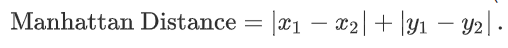

In [17]:
def manhattan_similarity(dict_name, id1, id2):
    import math
    
    try:   
        dict_name = dict_name
    
        if id1 == '':
            id1 = int(input("Please insert your first id for music features: "))
        else:
            id1 = id1
        
        if id2 == '':
            id2 = int(input("Please insert your second id for music features: "))
        else:
            id2 = id2
                
        if id1 == id2:
            print("You can't have the same ID, please choose 2 different IDs.")
        else:
            query = input("Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. ").capitalize()

            if query == '' or query == "No".capitalize():
                print("Comparing all respective features.\n")
                feature_list = list(dict_name[id1].values())[-9:]
                feature_list2 = list(dict_name[id2].values())[-9:]
                key_list = str(list(dict_name[id1].keys())[-9:]).split(',')
            
                for i in range(0,9):
                    for value in feature_list, feature_list2:
                        x = (feature_list[i]) 
                        y = (feature_list2[i]) 
                        distance = abs(x - y) #one-dimensional manhattan
                    print(key_list[i].strip('[]').strip(' '), round(distance, 3))
            
            else:
                x = dict_name[id1][query]
                y = dict_name[id2][query]
                
                #if len(list(x)) or len(list(y)) > 1:
                    #compare them all
                #else: do what is below
                
                distance = abs(x - y) #one-dimensional manhattan  
                return(print("Manhattan Distance of", query, "is", round(distance, 3)))
            
    except KeyError as keyerror:
        print("That feature doesn't exist.", keyerror)
    except ValueError as valueerror:
        print("Your entry is invalid, please make sure your entry was the correct format.")
    except TypeError as typeerror:
        print("Invalid type entered.", typeerror)
    except IndexError:
        print("There was a problem, did you enter your dictionary name correctly?")
    except ZeroDivisionError:
        print("Sorry, but you cannot divide by 0")

In [18]:
manhattan_similarity(features, 6000, 40350)

Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. 
Comparing all respective features.

'Accoustiness' 0.755
'Danceability' 0.153
'Energy' 0.124
'Liveness' 0.291
'Loudness' 0.701
'Popularity' 42.0
'Speechiness' 0.893
'Tempo' 48.182
'Valence' 0.377


In [19]:
euclidean_similarity(features, 30, 40)
cosine_similarity(features, 30, 40)
pearson_similarity(features, 30, 40)
jaccard_similarity(features, 30, 40)
manhattan_similarity(features, 30, 40)

Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. 
Comparing all respective features.

'Accoustiness' 0.091
'Danceability' 0.023
'Energy' 0.062
'Liveness' 0.084
'Loudness' 3.232
'Popularity' 0.0
'Speechiness' 0.004
'Tempo' 27.398
'Valence' 0.158
Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. 
Comparing all respective features.

'Accoustiness' 1.0
'Danceability' 1.0
'Energy' 1.0
'Liveness' 1.0
'Loudness' 1.0
'Popularity' 1.0
'Speechiness' 1.0
'Tempo' 1.0
'Valence' 1.0
Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all features. 
Comparing all respective features.

'Accoustiness' 1.0
'Danceability' 1.0
'Energy' 1.0
'Liveness' 1.0
'Loudness' 1.0
'Popularity' nan
'Speechiness' 1.0
'Tempo' 1.0
'Valence' 1.0
Do you want to compare a specific feature? Enter no or leave the entry blank if you want to compare all 

In [178]:
artists[8]

{'ID': '6OJjveoYwJdIt76y0Pxpxw',
 'Artists': 'Carl Woitschach',
 'Song Name': 'Per aspera ad astra',
 'Accoustiness': 0.988,
 'Danceability': 0.555,
 'Energy': 0.421,
 'Liveness': 0.105,
 'Loudness': -9.878,
 'Popularity': 0.0,
 'Speechiness': 0.0474,
 'Tempo': 123.31,
 'Valence': 0.857}

In [175]:
artists[5]

{'ID': '6N6tiFZ9vLTSOIxkj8qKrd',
 'Artists': '"Frédéric Chopin/ Vladimir Horowitz"',
 'Song Name': '"Polonaise-Fantaisie in A-Flat Major/ Op. 61"',
 'Accoustiness': 0.99,
 'Danceability': 0.21,
 'Energy': 0.204,
 'Liveness': 0.098,
 'Loudness': -16.829,
 'Popularity': 1.0,
 'Speechiness': 0.0424,
 'Tempo': 62.149,
 'Valence': 0.0693}